In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=2.5)

import missingno as msno

#ignore warnigs
import warnings
warnings.filterwarnings('ignore')


df_train=pd.read_csv('../input/titanic/train.csv')
df_test=pd.read_csv('../input/titanic/test.csv')


In [2]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [3]:
df_train.shape

(891, 12)

In [4]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
for col in df_test.columns:
    msg = 'column: {:>10}\t Percenst of NaN value : {:.2f}%'.format(col, 100 * (df_test[col].isnull().sum() / df_test[col].shape[0]))
    print(msg)

column: PassengerId	 Percenst of NaN value : 0.00%
column:     Pclass	 Percenst of NaN value : 0.00%
column:       Name	 Percenst of NaN value : 0.00%
column:        Sex	 Percenst of NaN value : 0.00%
column:        Age	 Percenst of NaN value : 20.57%
column:      SibSp	 Percenst of NaN value : 0.00%
column:      Parch	 Percenst of NaN value : 0.00%
column:     Ticket	 Percenst of NaN value : 0.00%
column:       Fare	 Percenst of NaN value : 0.24%
column:      Cabin	 Percenst of NaN value : 78.23%
column:   Embarked	 Percenst of NaN value : 0.00%


<AxesSubplot:>

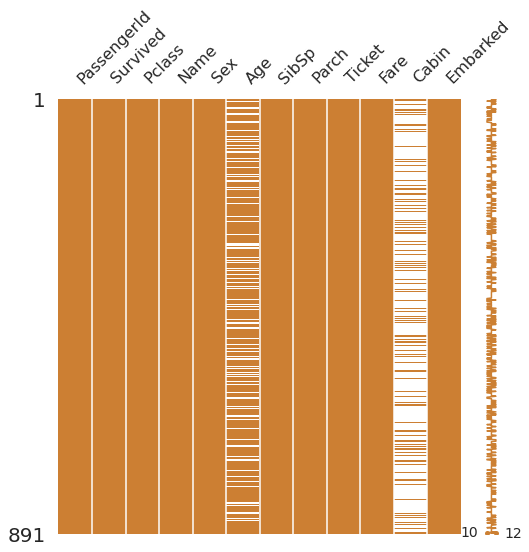

In [6]:
msno.matrix(df=df_train.iloc[:,:], figsize=(8,8), color=(0.8,0.5,0.2))

<AxesSubplot:>

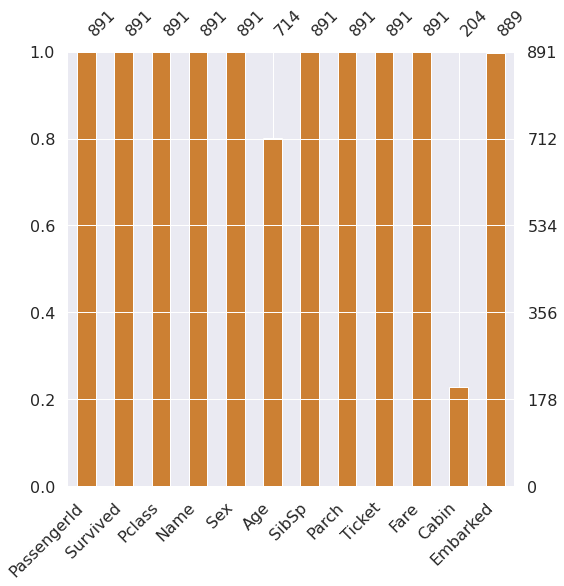

In [7]:
msno.bar(df=df_train.iloc[:,:], figsize=(8,8), color=(0.8,0.5,0.2))

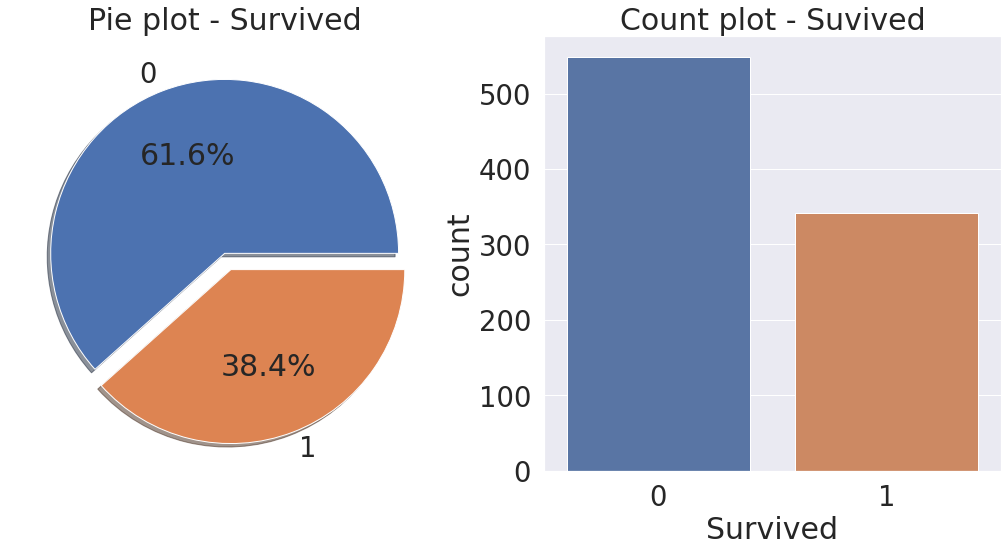

In [8]:
f, ax = plt.subplots(1, 2, figsize=(18,8))

df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0],shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Suvived')
plt.show()


<AxesSubplot:xlabel='Pclass'>

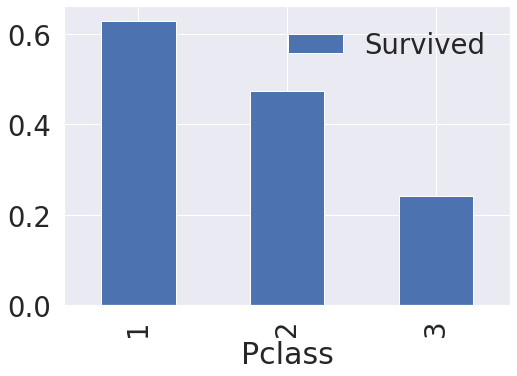

In [9]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient(cmap='gray')
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar()


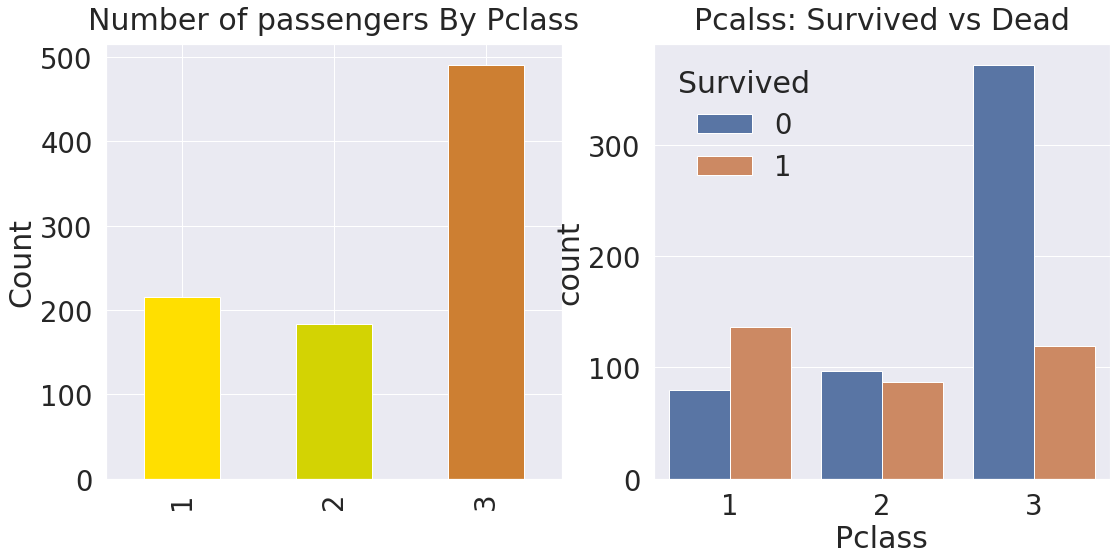

In [10]:
y_position= 1.02
f,ax= plt.subplots(1,2, figsize=(18,8))
df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D303'], ax=ax[0])
ax[0].set_title('Number of passengers By Pclass', y=y_position)
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Pcalss: Survived vs Dead', y=y_position)
plt.show()

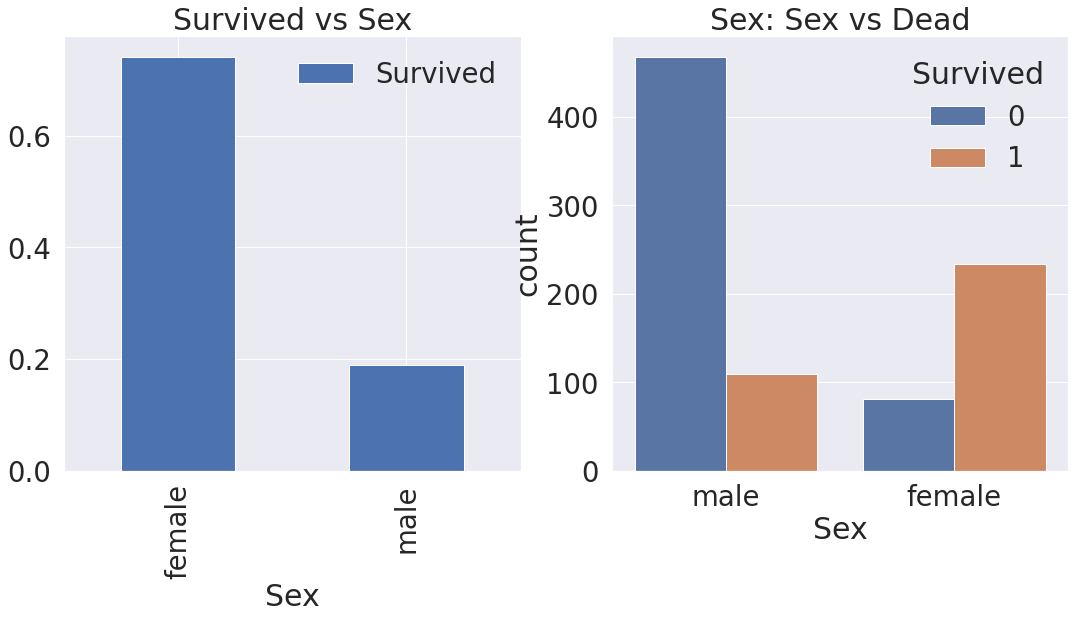

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(18,8))
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex: Sex vs Dead')
plt.show()

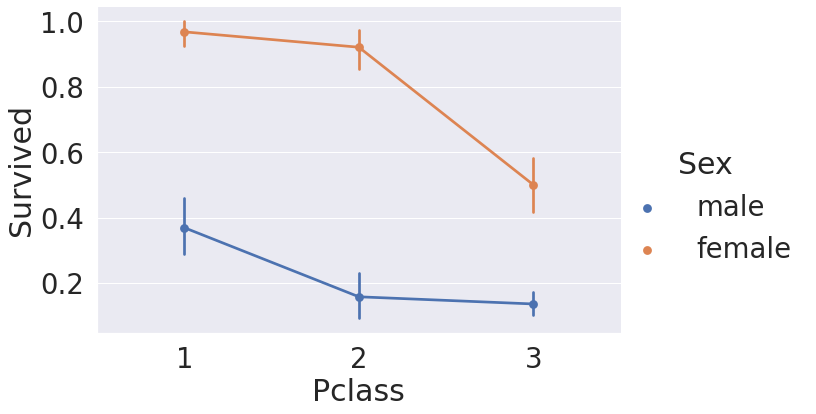

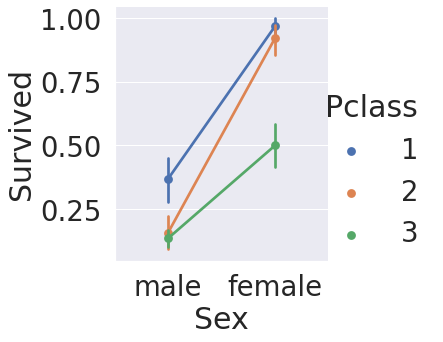

In [12]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True)
sns.factorplot('Pclass','Survived', hue='Sex', data=df_train, size=6, aspect=1.5)
sns.factorplot(x='Sex', y='Survived', hue='Pclass', data=df_train, saturaiion=.5, szie=9, aspect=1)


In [13]:
print("Oldest passenger's age: {:.1f} Years".format(df_train['Age'].max()))
print("Youngest passenger's age: {:.1f} Years".format(df_train['Age'].min()))
print("Average of passenger's age: {:.1f} Years".format(df_train['Age'].mean()))

Oldest passenger's age: 80.0 Years
Youngest passenger's age: 0.4 Years
Average of passenger's age: 29.7 Years


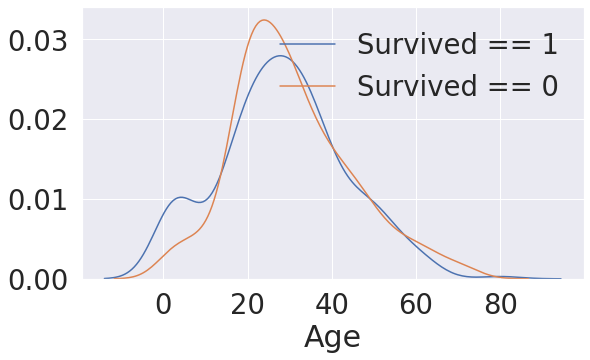

In [14]:
fig, ax= plt.subplots(1, 1, figsize=(9,5))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax=ax)
ax.set_ylabel('')
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()


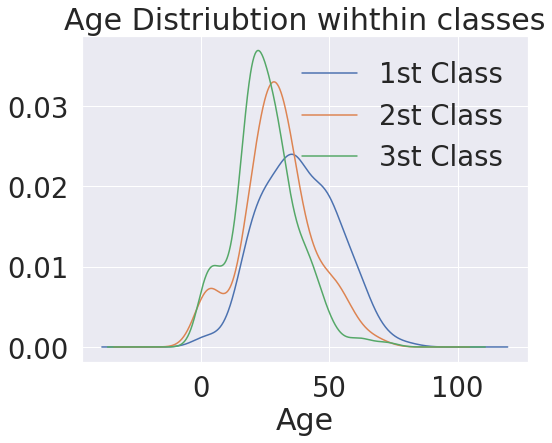

In [15]:
plt.figure(figsize=(8, 6))
df_train['Age'][df_train['Pclass'] == 1].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind='kde')

plt.xlabel('Age')
plt.ylabel('')
plt.title('Age Distriubtion wihthin classes')
plt.legend(['1st Class','2st Class','3st Class'])


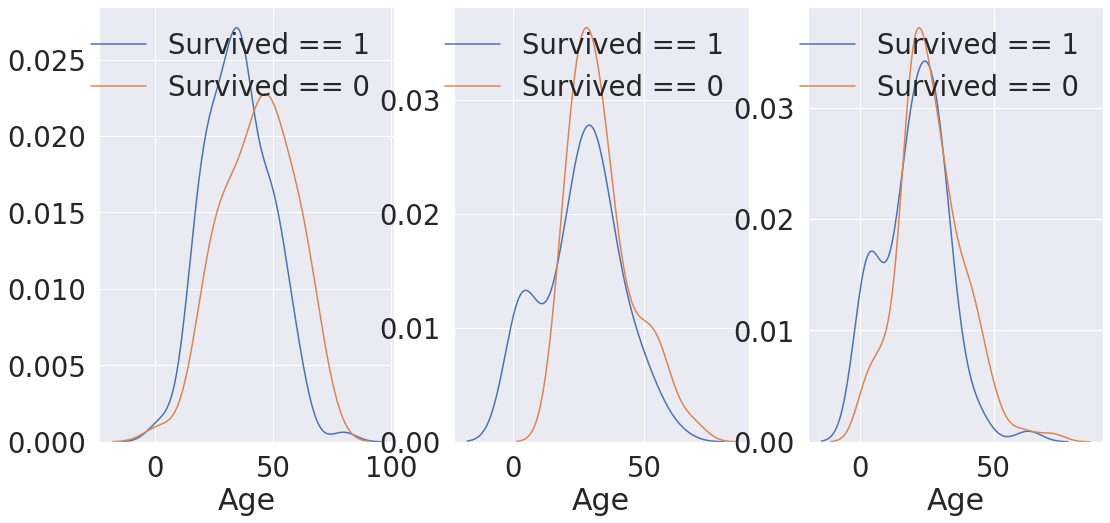

In [16]:
fig, ax= plt.subplots(1, 3, figsize=(18,8))
for i in range(3):
    sns.kdeplot(df_train[(df_train['Survived'] == 1) & (df_train['Pclass'] == i+1)]['Age'], ax=ax[i])
    sns.kdeplot(df_train[(df_train['Survived'] == 0) & (df_train['Pclass'] == i+1)]['Age'], ax=ax[i])
    ax[i].set_ylabel('')
    ax[i].legend(['Survived == 1', 'Survived == 0'])
plt.show()


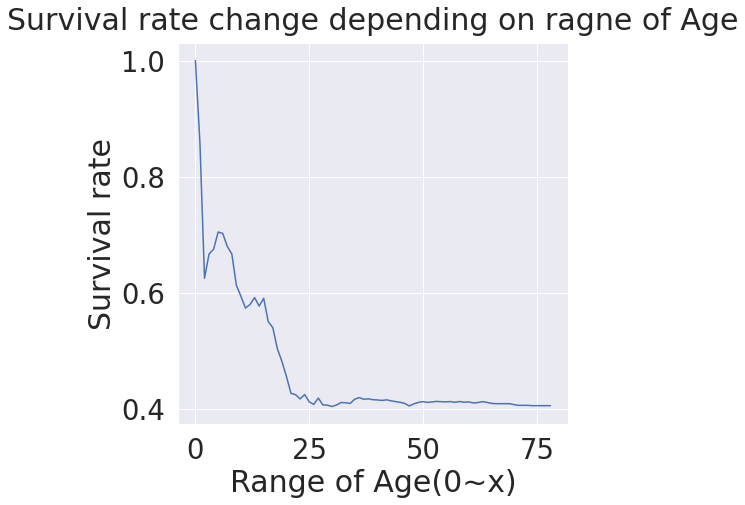

In [17]:
chage_age_range_survival_ratio = []
for i in range(1,80):
    chage_age_range_survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived']))
    
plt.figure(figsize=(7,7))
plt.plot(chage_age_range_survival_ratio)
plt.title('Survival rate change depending on ragne of Age', y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()


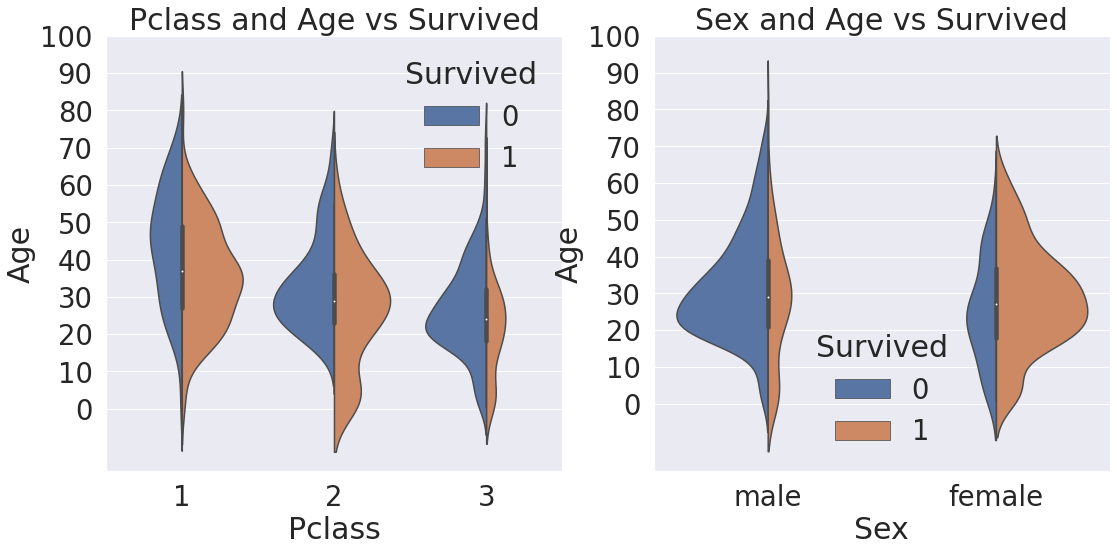

In [18]:
fig, ax = plt.subplots(1,2, figsize=(18,8))
sns.violinplot('Pclass', 'Age', hue='Survived', data=df_train, scale='count', split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))

sns.violinplot('Sex', 'Age', hue='Survived', data=df_train, scale='count', split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()


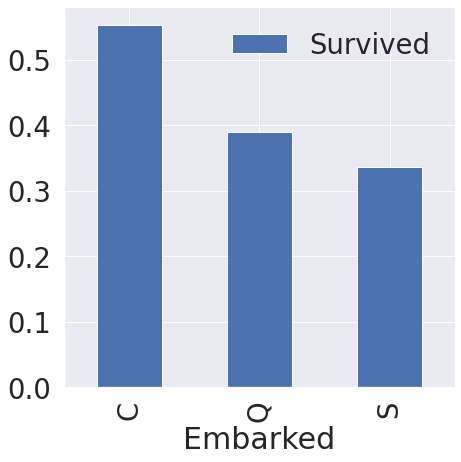

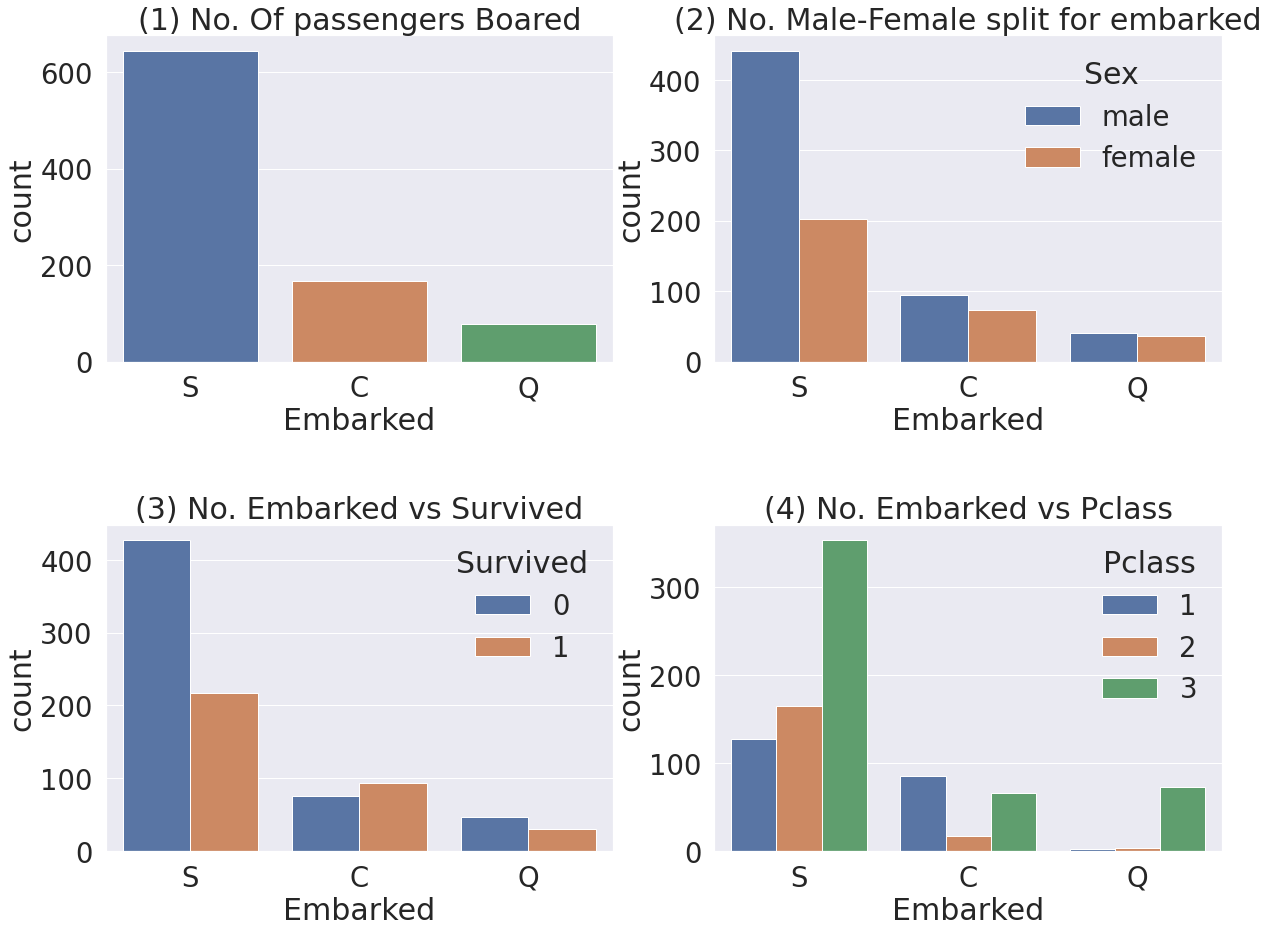

In [19]:
fig, ax= plt.subplots(1,1,figsize=(7,7))
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived', ascending= False).plot.bar(ax=ax)

fig, ax = plt.subplots(2, 2, figsize=(20, 15))
sns.countplot('Embarked', data=df_train, ax=ax[0,0])
ax[0, 0].set_title('(1) No. Of passengers Boared')
sns.countplot('Embarked', hue='Sex', data=df_train, ax=ax[0,1])
ax[0, 1].set_title('(2) No. Male-Female split for embarked')
sns.countplot('Embarked', hue='Survived', data=df_train, ax=ax[1,0])
ax[1, 0].set_title('(3) No. Embarked vs Survived')
sns.countplot('Embarked', hue='Pclass', data=df_train, ax=ax[1,1])
ax[1, 1].set_title('(4) No. Embarked vs Pclass')

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()


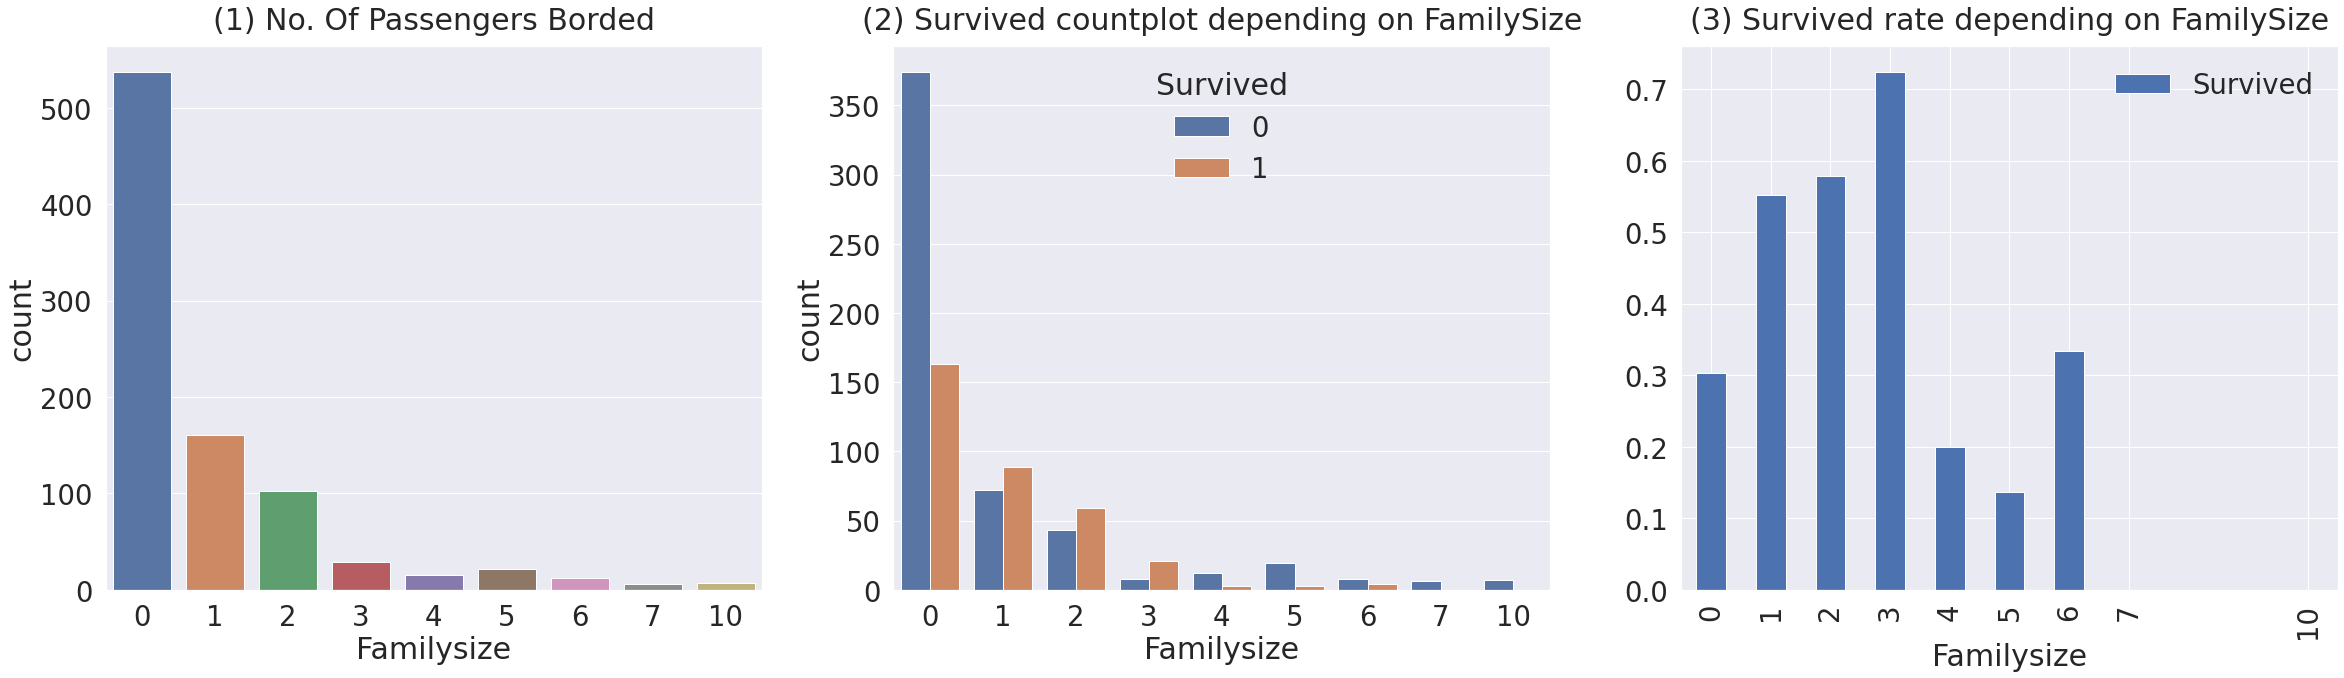

In [20]:
df_train['Familysize']= df_train['SibSp']+df_train['Parch'] * 1
df_test['Familysize']= df_test['SibSp']+df_train['Parch'] * 1

fig, ax= plt.subplots(1, 3, figsize=(40, 10))
sns.countplot('Familysize', data=df_train, ax=ax[0])
ax[0].set_title('(1) No. Of Passengers Borded', y=1.02)

sns.countplot('Familysize', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize', y=1.02)

df_train[['Familysize', 'Survived']].groupby(['Familysize'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize', y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()


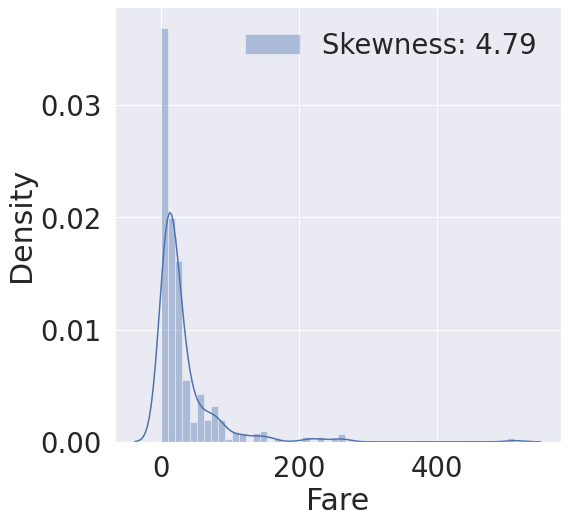

In [21]:
fig, ax= plt.subplots(1, 1, figsize=(8,8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness: {:.2f}'.format(df_train['Fare'].skew(), ax=ax))
g = g.legend(loc='best')

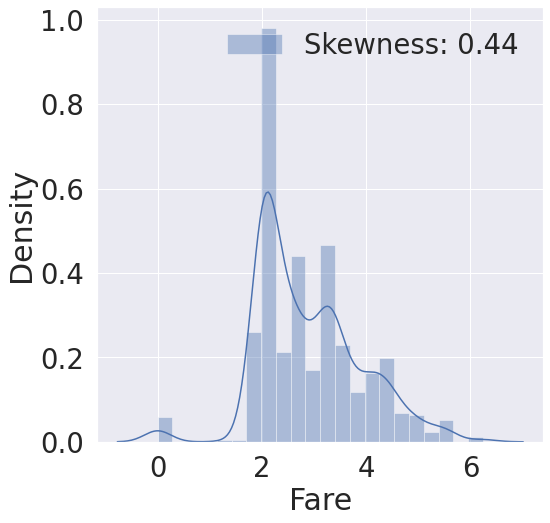

In [22]:
df_train['Fare']=df_train['Fare'].map(lambda i: np.log(i) if i>0 else 0)
df_test['Fare']=df_test['Fare'].map(lambda i: np.log(i) if i>0 else 0)
fig, ax= plt.subplots(1, 1, figsize=(8,8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness: {:.2f}'.format(df_train['Fare'].skew(), ax=ax))
g = g.legend(loc='best')

In [23]:
df_train['initial'] = df_train['Name'].str.extract('([A-Za-z]+)\.')
df_test['initial'] = df_test['Name'].str.extract('([A-Za-z]+)\.')
pd.crosstab(df_train['initial'], df_train['Sex']).T



initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


<AxesSubplot:xlabel='initial'>

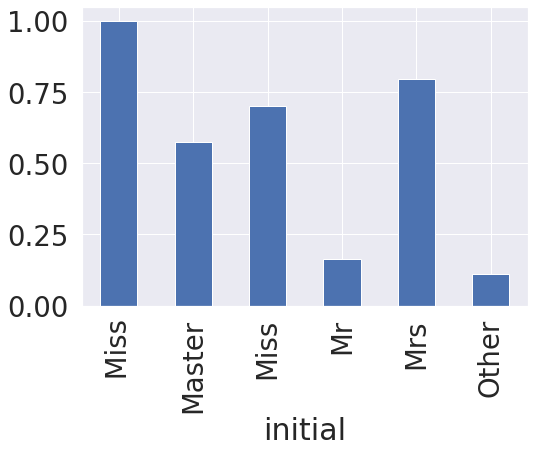

In [24]:
df_train['initial'].replace(['Mlle', 'Mme','Ms', 'Dr', 'Major', 'Lady', 'Countess', 'Jonkheer', 'Col', 'Rev', 'Capt', 'Sir', 'Don', 'Dona'],
                            ['Miss', 'Miss',' Miss', 'Mr', 'Mr', 'Mrs', 'Mrs', 'Other','Other', 'Other', 'Mr', 'Mr', 'Mr', 'Mrs'], inplace=True)
df_test['initial'].replace(['Mlle', 'Mme', 'Ms', 'Dr', 'Major', 'Lady', 'Countess', 'Jonkheer', 'Col', 'Rev', 'Capt', 'Sir', 'Don', 'Dona'],
                            ['Miss', 'Miss',' Miss', 'Mr', 'Mr', 'Mrs', 'Mrs', 'Other','Other', 'Other', 'Mr', 'Mr', 'Mr', 'Mrs'], inplace=True)

df_train.groupby('initial')['Survived'].mean().plot.bar()

In [25]:
df_train['Embarked'].fillna('S', inplace=True)
df_test['Embarked'].fillna('S', inplace=True)

In [26]:
def category_age(x):
    if x < 10:
        return 0 
    elif x < 20:
        return 1
    elif x < 30:
        return 2
    elif x < 40:
        return 3
    elif x < 50:
        return 4
    elif x < 60:
        return 5
    elif x < 70:
        return 6
    else:
        return 7

In [27]:
df_train['Age_cat'] = df_train['Age'].apply(category_age) 
df_test['Age_cat'] = df_test['Age'].apply(category_age) 

df_train.drop(['Age'], axis=1, inplace=True)
df_test.drop(['Age'], axis=1, inplace=True)

In [28]:
df_train['initial'] = df_train['initial'].map({'Master': 0, 'Miss' : 1, 'Mr' :2, 'Mrs' : 3, 'Other' : 4})
df_train['Embarked'] = df_train['Embarked'].map({'C' : 0, 'Q' : 1, 'S' :2})
df_test['initial'] = df_test['initial'].map({'Master': 0, 'Miss' : 1, 'Mr' :2, 'Mrs' : 3, 'Other' : 4})
df_test['Embarked'] = df_test['Embarked'].map({'C' : 0, 'Q' : 1, 'S' :2})

In [29]:
df_train.Embarked.isnull().any()

False

In [30]:
df_train['Sex'].unique()
df_train['Sex'] = df_train['Sex'].map({'female':0, 'male': 1})
df_test['Sex'] = df_test['Sex'].map({'female':0, 'male': 1})

In [31]:
heatmap_data= df_train[['Survived', 'Pclass', 'Sex', 'Fare', 'Embarked', 'Familysize', 'initial', 'Age_cat']]

<AxesSubplot:title={'center':'Pearson Crrealation of Features'}>

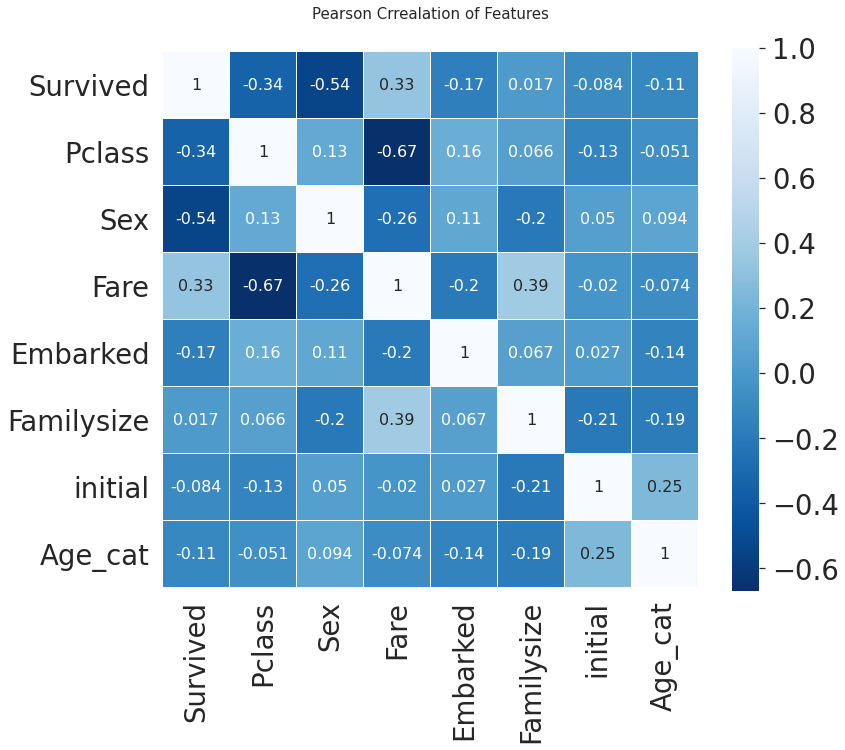

In [32]:
colormap= plt.cm.Blues_r
plt.figure(figsize=(12,10))
plt.title('Pearson Crrealation of Features', y=1.05, size=15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0,
           square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={'size':16})

In [33]:
df_train = pd.get_dummies(df_train, columns=['initial'], prefix='initial')
df_test = pd.get_dummies(df_test, columns=['initial'], prefix='initial')


In [34]:
df_train= pd.get_dummies(df_train, columns=['Embarked'], prefix='Embarked')
df_test= pd.get_dummies(df_test, columns=['Embarked'], prefix='Embarked')


In [35]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Familysize,Age_cat,initial_0.0,initial_1.0,initial_2.0,initial_3.0,initial_4.0,Embarked_0,Embarked_1,Embarked_2
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,1.981001,NaN,1,2,0,0,1,0,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,4.266662,C85,1,3,0,0,0,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,2.070022,NaN,0,2,0,1,0,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,3.972177,C123,1,3,0,0,0,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,2.085672,NaN,0,3,0,0,1,0,0,0,0,1


In [36]:
df_train.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)
df_test.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [38]:
X_train= df_train.drop('Survived', axis=1).values
target_label= df_train['Survived'].values
X_test= df_test.values
         

In [39]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, target_label, test_size=0.3, random_state=2018)

In [40]:
model = RandomForestClassifier()
model.fit(X_train, Y_train)

RandomForestClassifier()

In [41]:
prediction = model.predict(X_val)

In [42]:
print("총 {} 명중 {:.2f}% 정확도로 생존 맞춤".format(Y_val.shape[0], 100 * metrics.accuracy_score(prediction, Y_val)))

총 268 명중 82.46% 정확도로 생존 맞춤


In [43]:
(prediction == Y_val).sum() / prediction.shape[0]

0.8246268656716418

In [44]:
model.feature_importances_

array([0.09339283, 0.10570057, 0.32497573, 0.08813727, 0.13610158,
       0.01320054, 0.03879724, 0.12313146, 0.02609695, 0.00310884,
       0.01276771, 0.0139432 , 0.02064607])

In [45]:
df_train.head()

,Survived,Pclass,Sex,Fare,Familysize,Age_cat,initial_0.0,initial_1.0,initial_2.0,initial_3.0,initial_4.0,Embarked_0,Embarked_1,Embarked_2
0,0,3,1,1.981001,1,2,0,0,1,0,0,0,0,1
1,1,1,0,4.266662,1,3,0,0,0,1,0,1,0,0
2,1,3,0,2.070022,0,2,0,1,0,0,0,0,0,1
3,1,1,0,3.972177,1,3,0,0,0,1,0,0,0,1
4,0,3,1,2.085672,0,3,0,0,1,0,0,0,0,1


In [46]:
from pandas import Series

In [47]:
feature_importance= model.feature_importances_
Series_feat_imp = Series(feature_importance, index=df_test.columns)

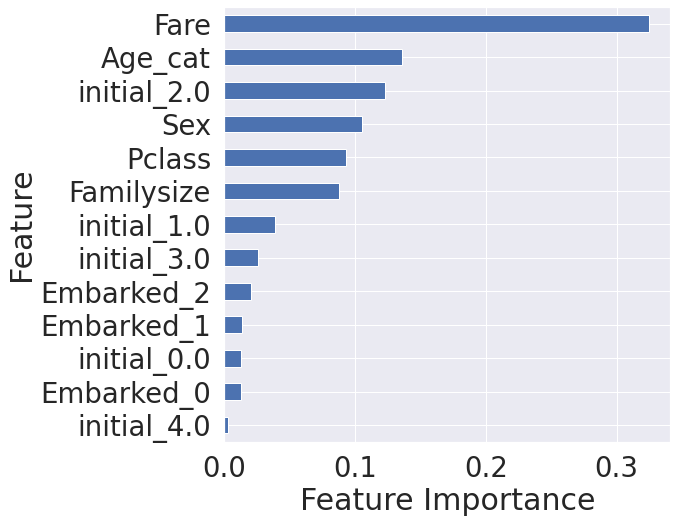

In [48]:
plt.figure(figsize=(8,8))
Series_feat_imp.sort_values(ascending=True).plot.barh()
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.show()

In [49]:
submission = pd.read_csv("../input/titanic/gender_submission.csv")

In [50]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [51]:
prediction = model.predict(X_test)

In [52]:
submission['Survived']=prediction

In [53]:
submission.to_csv('./my_1st_submission', index=False)